<a href="https://colab.research.google.com/github/LouLouoffer/Banking-Customer-Churn-Prediction/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Data is called the Bank Customers Churn dataset. It contains 14 columns and 10000 observations.

CustomerID: Identity number of each customer - Categorical
Surname: Last name of customer - Categorical
CreditScore: Credit Score of customer - Quantitative
Geography: Country of Residence - Categorical
Gender: Gender - Categorical
Age: Age - Quantitative
Tenure: How long they have been using account - Quantitative
Balance: Amount in account - Quantitative
NumOfProducts: The number of bank products used - Quantitative
HasCrCard: Has a credit Card - Categorical
IsActiveMember: Is active with different functionalities in bank (e.g. programs, bonds, insurance, etc) - Categorical
EstimatedSalary: Salary estimated by bank - Quantitative
Exited: Withdrew from bank - Categorical

# Part 0: Setup Google Drive Environment / Data Collection

import data from google drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# the same way we get id from last class
#https://drive.google.com/file/d/1DLm-DenbRSewr-MvOIEl5wqhcVIJMg5I/view?usp=sharing
id = "1DLm-DenbRSewr-MvOIEl5wqhcVIJMg5I"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Surname, Rownumber and CustomerID are no analysis value for the data with more types of value. Consider to drop

In [ ]:
y = df['Exited']
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

By separating the dependent variable y, we can see that there is no imbalance in the sample.

### Part 1.2:  Understand the features

In [ ]:
#df = df.replace(' ', np.NaN)
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing value found after inspection

In [ ]:
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


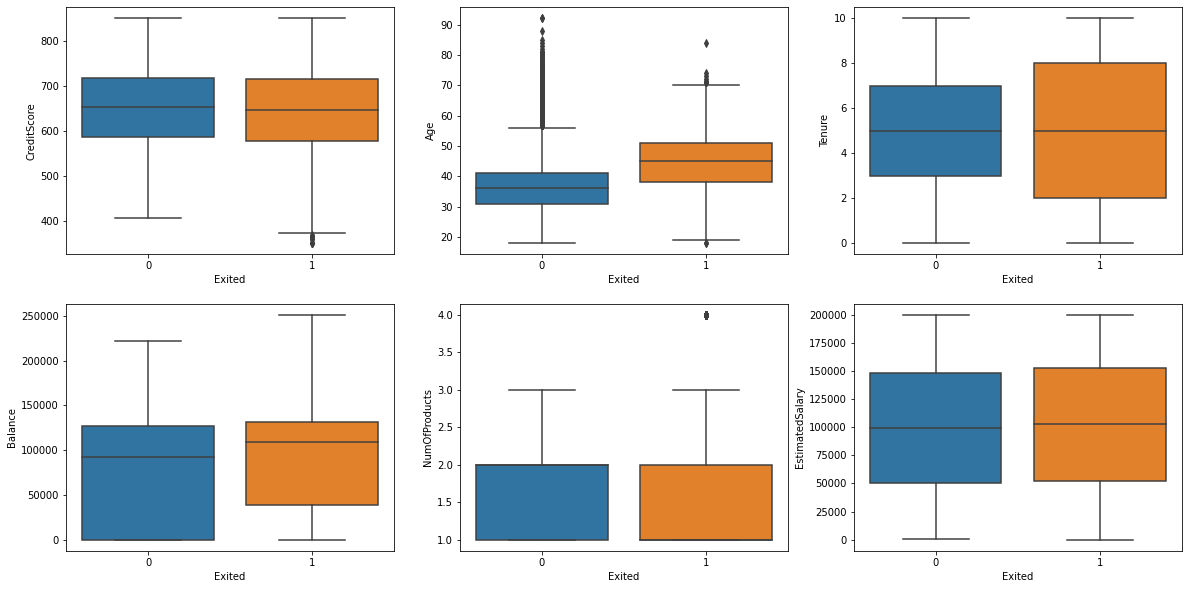

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax_arr = plt.subplots(2,3, figsize=(20,10))

sns.boxplot(x=df["Exited"], y=df["CreditScore"],ax = ax_arr[0][0])
sns.boxplot(x=df["Exited"], y=df["Age"],ax = ax_arr[0][1])
sns.boxplot(x=df["Exited"], y=df["Tenure"],ax = ax_arr[0][2])
sns.boxplot(x=df["Exited"], y=df["Balance"],ax = ax_arr[1][0])
sns.boxplot(x=df["Exited"], y=df["NumOfProducts"],ax = ax_arr[1][1])
sns.boxplot(x=df["Exited"], y=df["EstimatedSalary"],ax = ax_arr[1][2])

It can be seen that older people are more likely to close accounts. The tenure range of people who close accounts is larger, that is, people who have used accounts for a long time and people who have just opened accounts are easier to close accounts. People with an account balance of less than 50000 are less likely to close their accounts. First, these people may forget the existence of their accounts. Second, these people may live paycheck to paycheck.

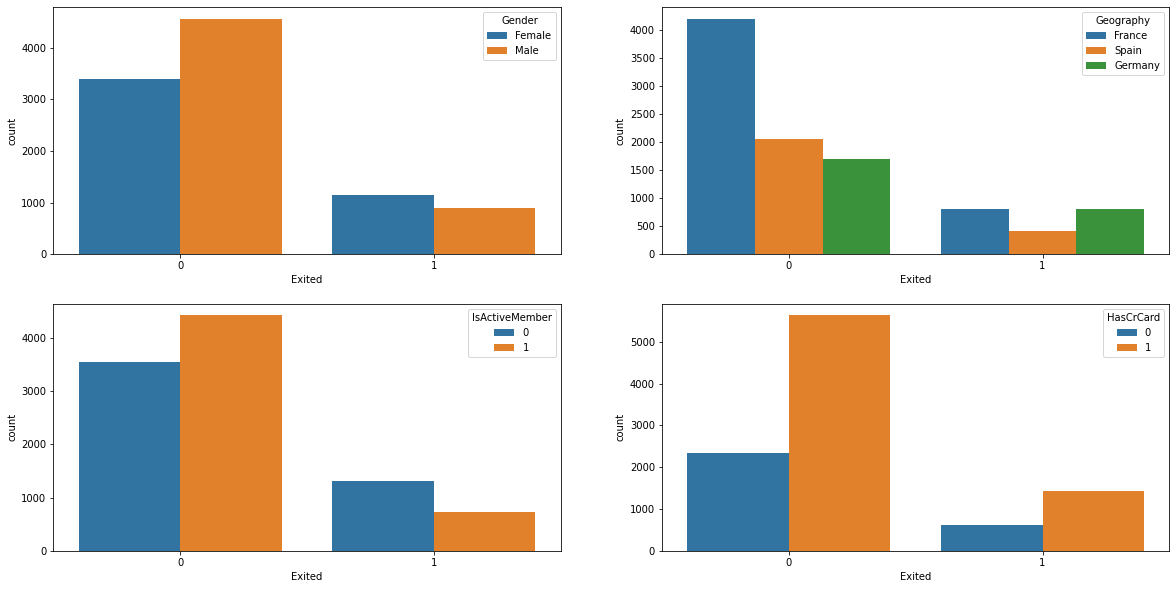

In [ ]:
fig, ax_arr = plt.subplots(2,2, figsize=(20,10))

sns.countplot(data=df, x='Exited',hue="Gender", ax = ax_arr[0][0])
sns.countplot(data=df, x='Exited',hue="Geography", ax = ax_arr[0][1])
sns.countplot(data=df, x='Exited',hue="IsActiveMember", ax = ax_arr[1][0])
sns.countplot(data=df, x='Exited',hue="HasCrCard", ax = ax_arr[1][1])

Relatively speaking, women are more likely to close their accounts. The withdrawal rate of German customers is the highest among the three countries, which may indicate that the bank is highly competitive in this field. As the result above, active member is easier to close the account.

# Part 2: Feature Preprocessing

In [ ]:
# drop useless features
X = df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1, inplace=False)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

Divide the dataset into train dataset and test dataset

So we should divide train/test first to prevent the train dataset from knowing the information of test dataset in advance

I use stratified sampling here：



In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,stratify=y,random_state=1207)
print('training data has ' + str(xtrain.shape[0]) + ' observation with ' + str(xtrain.shape[1]) + ' features')
print('test data has ' + str(xtest.shape[0]) + ' observation with ' + str(xtest.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


One hot encoding Geography：

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder().fit(xtrain[['Geography']])
ohe_column1 = pd.DataFrame(encoder1.transform(xtrain[['Geography']]).toarray(), columns=encoder1.get_feature_names())
ohe_column2 = pd.DataFrame(encoder1.transform(xtest[['Geography']]).toarray(), columns=encoder1.get_feature_names())
ohe_column1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_France,x0_Germany,x0_Spain
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
7495,1.0,0.0,0.0
7496,1.0,0.0,0.0
7497,0.0,0.0,1.0
7498,1.0,0.0,0.0


In [ ]:
xtrain_data = xtrain.drop(['Geography'],axis=1).reset_index(drop=True)
xtest_data = xtest.drop(['Geography'],axis=1).reset_index(drop=True)
xtest_data
xtrain_data 

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,633,Male,42,10,0.00,1,0,1,79408.17
1,708,Female,23,4,71433.08,1,1,0,103697.57
2,548,Female,37,9,0.00,2,0,0,98029.58
3,645,Female,48,7,90612.34,1,1,1,149139.13
4,729,Female,45,7,91091.06,2,1,0,71133.12
...,...,...,...,...,...,...,...,...,...
7495,474,Female,30,9,0.00,2,0,0,63158.22
7496,837,Female,29,9,0.00,2,1,1,41866.26
7497,602,Male,34,8,98382.72,1,1,0,39542.00
7498,850,Male,40,9,0.00,2,0,1,119232.33


In [ ]:
xtrain_data = pd.concat([xtrain_data, ohe_column1], axis=1)
xtest_data = pd.concat([xtest_data, ohe_column2], axis=1)
xtrain_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,474,Female,30,9,0.00,2,0,0,63158.22,1.0,0.0,0.0
7496,837,Female,29,9,0.00,2,1,1,41866.26,1.0,0.0,0.0
7497,602,Male,34,8,98382.72,1,1,0,39542.00,0.0,0.0,1.0
7498,850,Male,40,9,0.00,2,0,1,119232.33,1.0,0.0,0.0


onehotencoding Gender ：

In [ ]:
encoder2 = OneHotEncoder().fit(xtrain[['Gender']])
ohe_column11 = pd.DataFrame(encoder2.transform(xtrain[['Gender']]).toarray(), columns=encoder2.get_feature_names()).iloc[:,:1]
ohe_column22 = pd.DataFrame(encoder2.transform(xtest[['Gender']]).toarray(), columns=encoder2.get_feature_names()).iloc[:,:1]
ohe_column11

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Female
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
7495,1.0
7496,1.0
7497,0.0
7498,0.0


In [ ]:
xtrain_data = xtrain_data.drop(['Gender'],axis=1).reset_index(drop=True)
xtest_data = xtest_data.drop(['Gender'],axis=1).reset_index(drop=True)
xtest_data
xtrain_data 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain
0,633,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,474,30,9,0.00,2,0,0,63158.22,1.0,0.0,0.0
7496,837,29,9,0.00,2,1,1,41866.26,1.0,0.0,0.0
7497,602,34,8,98382.72,1,1,0,39542.00,0.0,0.0,1.0
7498,850,40,9,0.00,2,0,1,119232.33,1.0,0.0,0.0


In [ ]:
xtrain_data = pd.concat([xtrain_data, ohe_column11], axis=1)
xtest_data = pd.concat([xtest_data, ohe_column22], axis=1)
xtrain_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x0_Female
0,633,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0,0.0
1,708,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0,1.0
2,548,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0,1.0
3,645,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0,1.0
4,729,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,474,30,9,0.00,2,0,0,63158.22,1.0,0.0,0.0,1.0
7496,837,29,9,0.00,2,1,1,41866.26,1.0,0.0,0.0,1.0
7497,602,34,8,98382.72,1,1,0,39542.00,0.0,0.0,1.0,0.0
7498,850,40,9,0.00,2,0,1,119232.33,1.0,0.0,0.0,0.0


Standardize/Normalize Data：

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(xtrain_data[num_cols])
xtrain_data[num_cols] = scaler.transform(xtrain_data[num_cols])
xtest_data[num_cols] = scaler.transform(xtest_data[num_cols])
xtrain_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x0_Female
0,-0.172985,0.289202,1.731199,-1.218916,-0.912769,0,1,-0.352044,0.0,0.0,1.0,0.0
1,0.602407,-1.509319,-0.341156,-0.076977,-0.912769,1,0,0.072315,0.0,1.0,0.0,1.0
2,-1.051762,-0.184093,1.385806,-1.218916,0.796109,0,0,-0.026711,1.0,0.0,0.0,1.0
3,-0.048922,0.857156,0.695022,0.229625,-0.912769,1,1,0.866221,1.0,0.0,0.0,1.0
4,0.819517,0.573179,0.695022,0.237278,0.796109,1,0,-0.496617,0.0,0.0,1.0,1.0


#Part 3: Model training:

### Part 3.1: Random forest:

First fit random forest with default parameters：

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
frc = rfc.fit(xtrain_data, ytrain) 
result = rfc.score(xtest_data, ytest)
result

0.858

Use cross validation to determine which is better:'entropy' or 'gini' :

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
aa = []
for i in ['entropy', 'gini']:
  rfc = RandomForestClassifier(criterion=i,random_state=1)
  rf_cv=cross_val_score(rfc, xtrain_data, ytrain, cv=5).mean()
  aa.append(rf_cv)
print(max(aa),aa.index(max(aa)))

0.8652000000000001 1


gini is better

In [ ]:
rfc.n_estimators

100

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [96,100,103],
    'max_depth': [8,10,13] ,
    'max_features': [4,5,6],
    'min_samples_split': [3, 5, 6, 7]
}
Grid_RF = GridSearchCV(RandomForestClassifier(criterion='gini'),parameters, cv=5)
Grid_RF.fit(xtrain_data, ytrain)
print(Grid_RF.best_params_, Grid_RF.best_score_)

{'max_depth': 13, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 103} 0.8672000000000001


In [ ]:
best_RF_model = Grid_RF.best_estimator_

After repeated attempts and adjustments, determine the best accuracy and parameters

### Part 3.2: Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(xtrain_data, ytrain)
classifier_logistic.score(xtest_data, ytest)

0.8088

In [ ]:
parameters = {
    'penalty':('l1','l2'), 
    'C':(0.01, 0.05, 0.1, 0.5)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(xtrain_data, ytrain)
print(Grid_LR.best_params_, Grid_LR.best_score_)

{'C': 0.1, 'penalty': 'l1'} 0.8132000000000001


In [ ]:
best_LR_model = Grid_LR.best_estimator_

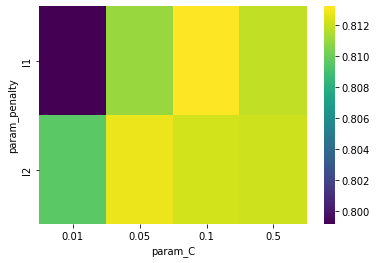

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

### Part 3.3: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
classifier_KNN = KNeighborsClassifier()
parameters = {
    'n_neighbors':[1,3,5,7,9,10]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(xtrain_data, ytrain)
print(Grid_KNN.best_params_, Grid_KNN.best_score_)

{'n_neighbors': 9} 0.8464


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

# Part 4: Model Evaluation

### Part 4.1: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(ytest,best_RF_model.predict(xtest_data))),
    ("Logistic Regression", confusion_matrix(ytest,best_LR_model.predict(xtest_data))),
    ("K nearest neighbor", confusion_matrix(ytest, best_KNN_model.predict(xtest_data)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8592
precision is: 0.7573770491803279
recall is: 0.4538310412573674

Logistic Regression
Accuracy is: 0.8112
precision is: 0.6209150326797386
recall is: 0.18664047151277013

K nearest neighbor
Accuracy is: 0.84
precision is: 0.6810631229235881
recall is: 0.4027504911591356



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, best_RF_model.predict(xtest_data)))


              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1991
           1       0.76      0.45      0.57       509

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.84      2500



In [ ]:
print(classification_report(ytest, best_KNN_model.predict(xtest_data)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1991
           1       0.68      0.40      0.51       509

    accuracy                           0.84      2500
   macro avg       0.77      0.68      0.71      2500
weighted avg       0.82      0.84      0.82      2500



In [ ]:
print(classification_report(ytest, best_LR_model.predict(xtest_data)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.62      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.72      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



### Part 4.2: Model Evaluation - Confusion Matrix (ROC,AUC)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_rf = best_RF_model.predict_proba(xtest_data)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(ytest, y_pred_rf)

y_pred_lr = best_LR_model.predict_proba(xtest_data)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(ytest, y_pred_lr)

y_pred_KNN = best_KNN_model.predict_proba(xtest_data)[:, 1]
fpr_KNN, tpr_KNN, thresh = roc_curve(ytest, y_pred_KNN)

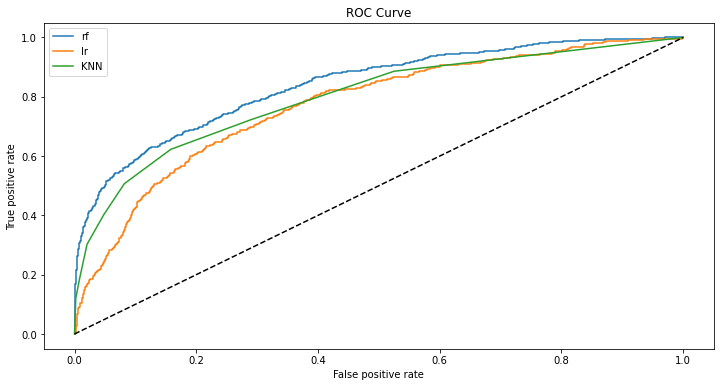

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_rf, tpr_rf, label = 'rf' )
plt.plot(fpr_lr, tpr_lr, label = 'lr' )
plt.plot(fpr_KNN, tpr_KNN, label = 'KNN' )
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


AUC score:

In [ ]:
metrics.auc(fpr_rf, tpr_rf)

0.8392560234217041

# Part 5: Feature Importance Discussion

In [ ]:
X_RF = X.copy()

encoder3 = OneHotEncoder().fit(X_RF[['Geography']])
ohe_column3 = pd.DataFrame(encoder3.transform(X_RF[['Geography']]).toarray(), columns=encoder3.get_feature_names())

encoder4 = OneHotEncoder().fit(X_RF[['Gender']])
ohe_column4 = pd.DataFrame(encoder4.transform(X_RF[['Gender']]).toarray(), columns=encoder4.get_feature_names()).iloc[:,:1]

X_RF = X_RF.drop(['Geography','Gender'],axis=1).reset_index(drop=True)
X_RF = pd.concat([X_RF, ohe_column3, ohe_column4], axis=1)
X_RF.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x0_Female
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0


In [ ]:
# check feature importance of random forest for feature selection
import numpy as np
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2423
EstimatedSalary : 0.1456
Balance : 0.1439
CreditScore : 0.1415
NumOfProducts : 0.1291
Tenure : 0.0815
IsActiveMember : 0.0409
x0_Germany : 0.0204
x0_Female : 0.0184
HasCrCard : 0.0179
